/home/ganesh/ml/env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


2968 2968
[  881.50968478   876.95764554   874.57032107   889.88746127   889.95516347
   879.79256762   879.03057387   880.79841398   875.82396871   874.18633154
   853.46184014   848.93588364   853.76590064   853.09438386   864.08145253
   831.35480146   820.03265218   830.20937332   833.16547385   845.2075895
   853.62429817   847.66127039   858.00110918   851.35257631   863.4346611
   874.51529491   878.37322948   873.4539971    880.05817757   879.41453646
   912.20917934   902.02125419   905.34248723   902.35102503   908.16284857
   904.97909472   905.69466774   912.0315065    914.15030494   944.43913534
   967.69966886   954.2230235    952.53860297   950.86242438   963.98934239
   959.42810143   964.5848471    962.35740024   964.43584745   960.01023287
   961.99007956   956.24317015   963.33154425   957.48957136   951.80230552
   949.64729145   949.05611034   947.55874076   944.99222482   949.48126959
   951.6654916    946.69178374   940.68880165   944.09572645   947.85819052
   9

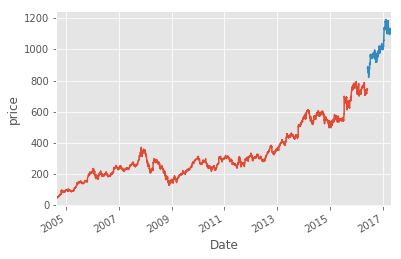

In [1]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

df = quandl.get('WIKI/GOOGL')

df  = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0

df['pct'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'pct', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
#df.dropna(inplace=True)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
Y = np.array(df['label'])

print (len(X), len(Y))

x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.01)

clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)

with open('linearregression.pickel', 'wb') as f:
    pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickel', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(x_test, y_test)

forecast_set = clf.predict(X_lately)

print (forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

#print(df.head())

print(df.tail())
    
df['Adj. Close'].plot()
df['Forecast'].plot()
#df.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()
